In [2]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [33]:
multiple_patients = True
ID = False
data = pd.read_csv("CHB_MIT.csv")
data = data.sample(n=1000)
X = data.loc[:, data.columns != "seizure"]
X = X.loc[:, X.columns != "start_time"]
X = X.loc[:, X.columns != "file ID"]
Y = np.asarray(data['seizure'])
feature_names = X.columns.tolist()
print('The number of samples for the non-seizure class is:', Y.shape[0])
print('The number of samples for the seizure class is:', np.sum(Y))

# if multiple patients, one-hot encode patient ID
if multiple_patients:
    X = X.loc[:, X.columns != "subject"] 
    if ID:
        patient = pd.get_dummies(data['subject'], prefix='subject')
        X = pd.concat([X, patient], axis = 1)

The number of samples for the non-seizure class is: 1000
The number of samples for the seizure class is: 6


In [34]:
data

,start_time,FP1-F7_rms,FP1-F7_variance,FP1-F7_kurtosis,FP1-F7_skewness,FP1-F7_max_amp,FP1-F7_min_amp,FP1-F7_n_peaks,FP1-F7_n_crossings,FP1-F7_hfd,...,T8-P8-1_peak_freq,T8-P8-1_hjorth_mobility,T8-P8-1_hjorth_complexity,T8-P8-1_power_1hz,T8-P8-1_power_5hz,T8-P8-1_power_10hz,T8-P8-1_power_15hz,T8-P8-1_power_20hz,seizure,subject
109119,1389,0.000038,1.428470e-09,5.065523,0.120101,0.000199,-0.000193,171.0,104.0,0.075380,...,1.0,0.004472,117.030787,0.315858,0.262368,0.156839,0.150126,0.114809,0,chb03\chb03_33.csv
65482,844,0.000013,1.675378e-10,0.231548,0.051624,0.000040,-0.000038,145.0,112.0,0.049933,...,1.0,0.002612,193.438023,0.476187,0.179972,0.184173,0.092737,0.066932,0,chb03\chb03_08.csv
103074,2526,0.000039,1.491842e-09,2.000120,0.988134,0.000156,-0.000100,158.0,104.0,0.058770,...,1.0,0.003286,94.512460,0.319547,0.366756,0.169986,0.097722,0.045988,0,chb02\chb02_26.csv
15878,1514,0.000030,9.028683e-10,0.145764,-0.035253,0.000089,-0.000111,182.0,132.0,0.089435,...,4.0,0.004679,107.239800,0.396024,0.189480,0.130366,0.139239,0.144890,0,chb01\chb01_06.csv
96112,2746,0.000094,8.817036e-09,11.386281,2.360421,0.000571,-0.000313,157.0,111.0,0.076113,...,1.0,0.001752,254.445281,0.454723,0.249296,0.148731,0.082995,0.064254,0,chb01\chb01_32.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39595,94,0.000062,3.863756e-09,2.585414,-0.273609,0.000250,-0.000219,147.0,111.0,0.061665,...,2.0,0.008308,65.851464,0.183998,0.188662,0.150020,0.216407,0.260912,0,chb02\chb02_05.csv
11892,1119,0.000055,3.034609e-09,14.110008,0.592315,0.000353,-0.000298,218.0,258.0,0.120110,...,2.0,0.002533,174.008216,0.462390,0.241103,0.114357,0.097333,0.084818,0,chb01\chb01_05.csv
57328,3463,0.000016,2.577838e-10,0.062357,0.378127,0.000046,-0.000041,167.0,78.0,0.072257,...,3.0,0.003740,124.304500,0.432849,0.175333,0.124189,0.166370,0.101259,0,chb03\chb03_05.csv
41169,1668,0.000055,3.044047e-09,8.310561,1.104122,0.000332,-0.000206,172.0,138.0,0.075104,...,26.0,0.008995,61.323462,0.145394,0.149706,0.153926,0.257471,0.293503,0,chb02\chb02_05.csv


In [35]:
X=X.values
#X=X[:,1:]
X

array([[3.79453372e-05, 1.42847027e-09, 5.06552307e+00, ...,
        1.56838768e-01, 1.50125920e-01, 1.14809260e-01],
       [1.29864456e-05, 1.67537814e-10, 2.31548045e-01, ...,
        1.84172719e-01, 9.27369856e-02, 6.69318344e-02],
       [3.86187258e-05, 1.49184208e-09, 2.00012034e+00, ...,
        1.69986166e-01, 9.77222697e-02, 4.59883021e-02],
       ...,
       [1.61451857e-05, 2.57783768e-10, 6.23571089e-02, ...,
        1.24188883e-01, 1.66370485e-01, 1.01259190e-01],
       [5.51740190e-05, 3.04404678e-09, 8.31056051e+00, ...,
        1.53926106e-01, 2.57470649e-01, 2.93503047e-01],
       [3.25231217e-05, 1.05805280e-09, 7.89202658e+00, ...,
        1.69633668e-01, 1.70097041e-01, 1.02596283e-01]])

In [36]:
y=np.array(data['seizure'])
Y=np_utils.to_categorical(y)
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [38]:
np.shape(X_train)

(800, 506)

In [39]:
X_train = X_train.reshape(-1,506,1)
X_test = X_test.reshape(-1,506,1)
X_train.shape
X_train.shape

(800, 506, 1)

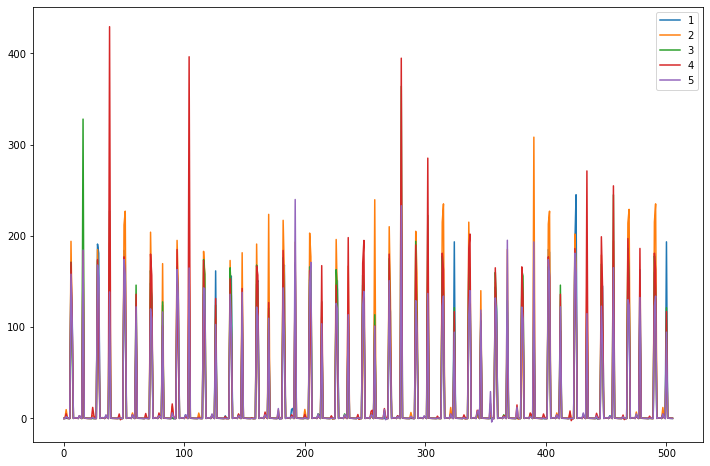

In [40]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

In [41]:
model = Sequential()
model.add(LSTM(56, input_shape=(127,1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 127, 56)           12992     
_________________________________________________________________
dropout_4 (Dropout)          (None, 127, 56)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 56)                25312     
_________________________________________________________________
dropout_5 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1140      
_________________________________________________________________
activation_4 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [42]:
XT=(X_test[:,::4]-X_test.mean())/X_test.std()
XT=np.asarray(XT).astype(np.float32)
YT=Y_test[:,1:]
YT=np.asarray(YT).astype(np.float32)

In [46]:
np.shape(X)


(800, 127, 1)

In [45]:
X=(X_train[:,::4]-X_train.mean())/X_train.std()
X=np.asarray(X).astype(np.float32)
Y=Y_train[:,1:]
Y=np.asarray(Y).astype(np.float32)

In [47]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
hist = model.fit(X,Y,validation_data=(XT,YT),epochs = 20, batch_size=128,shuffle=False)

Epoch 1/20
7/7 [==============================] - 3s 441ms/step - loss: 0.6932 - accuracy: 0.6413 - val_loss: 0.6932 - val_accuracy: 0.0050
Epoch 2/20
7/7 [==============================] - 3s 365ms/step - loss: 0.6932 - accuracy: 0.3400 - val_loss: 0.6932 - val_accuracy: 0.9950
Epoch 3/20
7/7 [==============================] - 2s 306ms/step - loss: 0.6932 - accuracy: 0.5225 - val_loss: 0.6932 - val_accuracy: 0.0050
Epoch 4/20
7/7 [==============================] - 3s 419ms/step - loss: 0.6932 - accuracy: 0.5638 - val_loss: 0.6932 - val_accuracy: 0.9950
Epoch 5/20
7/7 [==============================] - 3s 416ms/step - loss: 0.6932 - accuracy: 0.4538 - val_loss: 0.6931 - val_accuracy: 0.0300
Epoch 6/20
7/7 [==============================] - 2s 295ms/step - loss: 0.6932 - accuracy: 0.5163 - val_loss: 0.6931 - val_accuracy: 0.8650
Epoch 7/20
7/7 [==============================] - 2s 339ms/step - loss: 0.6932 - accuracy: 0.4663 - val_loss: 0.6931 - val_accuracy: 0.2500
Epoch 8/20
7/7 [====

In [3]:
#Autoencoder
def augment_data(labels, eeg_data): 
	import random
	# data_augmentation using white gaussian noise + shuffling
	for i in range(len(eeg_data)): 
		noise = np.random.normal(0, 0.1, len(eeg_data[0]))
		eeg_data.append([x + y for x, y in zip(eeg_data[i], noise)])
		labels.append(labels[i])

	combined = list(zip(labels, eeg_data))
	random.shuffle(combined)
	labels[:], eeg_data[:] = zip(*combined)

	return labels, eeg_data

In [4]:
def save_data(filepath, binary, augment): 
    from keras.utils import np_utils, plot_model
    csv_data = np.genfromtxt(filepath, delimiter=",")
    eeg_data = csv_data[1:]
    #print(eeg_data)
    labels = []
    cleaned_eeg_data = []
    if binary:  
        for i in range(len(eeg_data)):
            #seizure vs non-seizure only
            labels.append(0 if (eeg_data[i][-1] == 1) else 1)
            cleaned_eeg_data.append((eeg_data[i][:-1])[1:])
            
    else: 
        for i in range(len(eeg_data)):
            labels.append(eeg_data[i][-1]-1)
            cleaned_eeg_data.append((eeg_data[i][:-1])[1:])

    if augment: 
           labels, cleaned_eeg_data = augment_data(labels, cleaned_eeg_data)

    labels = np.array(labels)
    #labels = np_utils.to_categorical(labels)
	#np.save("dataset/y_test", labels)
    cleaned_eeg_data = np.array(cleaned_eeg_data)
    cleaned_eeg_data = np.reshape(cleaned_eeg_data, (cleaned_eeg_data.shape[0], cleaned_eeg_data.shape[1], 1, 1))
    #print(cleaned_eeg_data)
    return labels,cleaned_eeg_data
	#np.save("dataset/x_test", cleaned_eeg_data)

In [5]:
labels,cleaned_eeg_data=save_data(r'C:\Users\LEKSHMI HARITHA\mtech AI\AML project\chb.csv', binary=1, augment=0)

In [63]:
data[1:]

,start_time,FP1-F7_rms,FP1-F7_variance,FP1-F7_kurtosis,FP1-F7_skewness,FP1-F7_max_amp,FP1-F7_min_amp,FP1-F7_n_peaks,FP1-F7_n_crossings,FP1-F7_hfd,...,T8-P8-1_peak_freq,T8-P8-1_hjorth_mobility,T8-P8-1_hjorth_complexity,T8-P8-1_power_1hz,T8-P8-1_power_5hz,T8-P8-1_power_10hz,T8-P8-1_power_15hz,T8-P8-1_power_20hz,seizure,subject
1,1,0.000072,5.183641e-09,4.726739,0.330759,0.000326,-0.000265,192.0,168.0,0.107901,...,1.0,0.003211,148.493351,0.384135,0.234295,0.140616,0.115382,0.125572,0,chb01\chb01_01.csv
2,2,0.000069,4.818348e-09,5.677232,0.423363,0.000326,-0.000265,202.0,184.0,0.117626,...,1.0,0.003564,142.209197,0.389655,0.238327,0.124545,0.109260,0.138213,0,chb01\chb01_01.csv
3,3,0.000071,5.102686e-09,6.534230,0.724773,0.000418,-0.000265,202.0,177.0,0.120345,...,1.0,0.003514,140.840795,0.396989,0.232559,0.120853,0.118132,0.131467,0,chb01\chb01_01.csv
4,4,0.000077,5.873400e-09,5.990930,0.941052,0.000418,-0.000265,199.0,167.0,0.112363,...,1.0,0.003494,142.434220,0.390794,0.230665,0.125717,0.119646,0.133177,0,chb01\chb01_01.csv
5,5,0.000077,5.880741e-09,5.996111,0.955874,0.000418,-0.000265,198.0,177.0,0.112196,...,1.0,0.003434,141.066648,0.398177,0.229580,0.119040,0.123619,0.129584,0,chb01\chb01_01.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125680,3586,0.000034,1.124454e-09,2.698922,0.381928,0.000139,-0.000131,138.0,74.0,0.043673,...,1.0,0.002097,232.847613,0.525994,0.272667,0.090671,0.062933,0.047736,0,chb08\chb08_02.csv
125681,3587,0.000037,1.347834e-09,2.489503,0.578273,0.000139,-0.000131,137.0,81.0,0.046276,...,1.0,0.001984,193.526391,0.512064,0.275926,0.095245,0.066291,0.050474,0,chb08\chb08_02.csv
125682,3588,0.000038,1.463877e-09,1.965774,0.526039,0.000139,-0.000131,132.0,79.0,0.041560,...,1.0,0.002086,201.997037,0.500888,0.292283,0.091711,0.066728,0.048390,0,chb08\chb08_02.csv
125683,3589,0.000039,1.484926e-09,1.810886,0.479832,0.000139,-0.000131,127.0,78.0,0.038024,...,1.0,0.001886,166.341236,0.506915,0.284493,0.096317,0.064934,0.047341,0,chb08\chb08_02.csv


In [99]:
np.shape(cleaned_eeg_data)

(1000, 15, 1, 1)

In [6]:
X_train = []
X_anomaly = []

for i in range(cleaned_eeg_data.shape[0]): 
    if labels[i] != 0: 
        X_train.append(cleaned_eeg_data[i])
    else: 
        X_anomaly.append(cleaned_eeg_data[i])



In [111]:
np.shape( X_train)

(981, 15, 1, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
X_train = np.asarray(X_train)
X_anomaly = np.asarray(X_anomaly)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_anomaly = X_anomaly.reshape(X_anomaly.shape[0], X_anomaly.shape[1])


In [8]:

#Normalizing the input
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_anomaly = scaler.fit_transform(X_anomaly)
X_train, X_test = X_train[0:700], X_train[700:]

In [114]:
np.shape(X_train)

(700, 15)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import keras
from keras.models import Model, load_model
from keras.layers import Input, Dense, GaussianDropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
import matplotlib.pyplot as pl

In [10]:
inputs = Input(shape=(15,))
x = GaussianDropout(0.05)(inputs)
x = Dense(80, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(40, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(20, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(40, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(80, activation='tanh')(x)
x = BatchNormalization()(x)
predictions = Dense(15, activation='tanh')(x)

In [11]:
np.shape(X_train)


(700, 15)

In [12]:
from keras.models import Model, load_model
autoEncoder = Model(inputs, predictions)
autoEncoder.summary()

adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
autoEncoder.compile(adam, loss='mse',metrics=['accuracy'])	

#tensorboard = keras.callbacks.TensorBoard(log_dir="logs/{}".format(os.path.basename(__file__)[:-3]), histogram_freq=1, write_graph=True, write_images=True)



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
gaussian_dropout (GaussianDr (None, 15)                0         
_________________________________________________________________
dense (Dense)                (None, 80)                1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 80)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                3240      
_________________________________________________________________
batch_normalization_1 (Batch (None, 40)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820   

In [17]:
hist= autoEncoder.fit(X_train, X_train, epochs=50, verbose=1, batch_size=32, shuffle=True, validation_split=0.2)

Epoch 1/50
18/18 [==============================] - 0s 9ms/step - loss: 0.0118 - accuracy: 0.5554 - val_loss: 0.0143 - val_accuracy: 0.4929
Epoch 2/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0120 - accuracy: 0.5661 - val_loss: 0.0141 - val_accuracy: 0.4429
Epoch 3/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0114 - accuracy: 0.5946 - val_loss: 0.0136 - val_accuracy: 0.4500
Epoch 4/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0118 - accuracy: 0.5536 - val_loss: 0.0142 - val_accuracy: 0.4357
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0119 - accuracy: 0.5839 - val_loss: 0.0140 - val_accuracy: 0.4714
Epoch 6/50
18/18 [==============================] - 0s 9ms/step - loss: 0.0117 - accuracy: 0.5286 - val_loss: 0.0132 - val_accuracy: 0.4643
Epoch 7/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0114 - accuracy: 0.5821 - val_loss: 0.0134 - val_accuracy: 0.4714
Epoch 8/50
18/18 [==

In [18]:
ypred=autoEncoder.predict(X_anomaly)
yp=np.zeros((X_anomaly.shape[0]))
yo=np.ones((X_anomaly.shape[0]))
for i in range(X_anomaly.shape[0]):
    yp[i]=np.argmax(ypred[i])+1
    yo[i]=np.argmax(X_anomaly[i])

In [19]:
#conversion of classes
for i in range(X_anomaly.shape[0]):
    if yo[i]!=1:
        yo[i]=0
    if yp[i]!=1:
        yp[i]=0

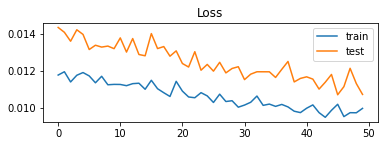

In [20]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training


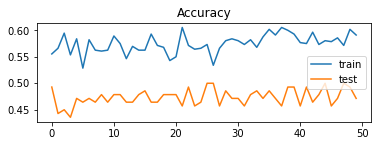

In [21]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist.history['accuracy'], label='train')
pyplot.plot(hist.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


In [22]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [23]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(yo, yp)

cm 

array([[15,  0],
       [ 4,  0]], dtype=int64)

In [24]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yo, yp)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yo, yp,zero_division=1)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yo, yp)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yo, yp)

Accuracy: 0.789474
Precision: 1.000000
Recall: 0.000000


false negatives: 9out of 19
false positives: 22out of 281


No handles with labels found to put in legend.


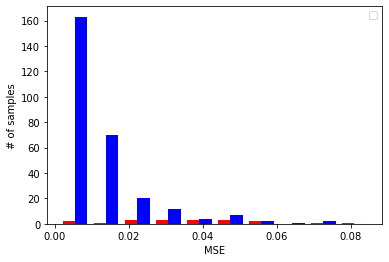

In [25]:
THRESHOLD = 0.03

predictions = autoEncoder.predict(X_anomaly)
mseSeizure = np.mean(np.power(X_anomaly - predictions, 2), axis=1)
print ("false negatives: " + str(np.sum(mseSeizure < THRESHOLD)) + "out of " + str(mseSeizure.shape[0]))

predictions = autoEncoder.predict(X_test)
mseNormal = np.mean(np.power(X_test - predictions, 2), axis=1)
print ("false positives: " + str(np.sum(mseNormal > THRESHOLD)) + "out of " + str(mseNormal.shape[0]))

plt.hist([mseSeizure, mseNormal], color=["red", "blue"])
plt.xlabel("MSE")
plt.ylabel("# of samples")
plt.legend()
plt.show()